# Imports

In [1]:
import copy
import matplotlib.pyplot as plt
import time
import random

# Matrises

### easy matrix

In [2]:
start_matrix = [[0, 0, 0, 0, 0, 0, 0, 0, 0],
                [2, 3, 4, 5, 6, 7, 8, 9, 1],
                [3, 4, 5, 6, 7, 8, 9, 1, 2],
                [4, 5, 6, 7, 8, 9, 1, 2, 3],
                [5, 6, 7, 8, 9, 1, 2, 3, 4],
                [6, 7, 8, 9, 1, 2, 3, 4, 5],
                [7, 8, 9, 1, 2, 3, 4, 5, 6],
                [8, 9, 1, 2, 3, 4, 5, 6, 7],
                [9, 1, 2, 3, 4, 5, 6, 7, 8]]

### empty matrix: no unique answer

In [3]:
start_matrix = ([[0]*9]*9)

### hard matrix

In [4]:
start_matrix = [[0, 5, 3, 0, 0, 0, 7, 9, 0],
                [0, 0, 9, 7, 5, 3, 4, 0, 0],
                [1, 0, 0, 0, 0, 0, 0, 0, 2],
                [0, 9, 0, 0, 8, 0, 0, 1, 0],
                [0, 0, 0, 9, 0, 7, 0, 0, 0],
                [0, 8, 0, 0, 3, 0, 0, 7, 0],
                [5, 0, 0, 0, 0, 0, 1, 0, 3],
                [0, 0, 7, 6, 4, 1, 2, 0, 0],
                [0, 6, 1, 0, 0, 0, 9, 4, 0]]

# Solver code

In [5]:

def print_sudoko(matrix):
    for row in matrix:
        print(row)


def column_from_matrix(matrix, column_number):
    column_numbers = []
    for row in range(9):
        column_numbers.append(matrix[row][column_number])
    return column_numbers


def no_zeros(matrix):
    for row in matrix:
        if 0 in row:
            return 0
    return 1


def zero_in_row(row):
    return row.count(0) > 0


def solve_sudoko(matrix):
    done = 0
    for row_num, row in enumerate(matrix):
        if zero_in_row(row):
            zero_position = row.index(0)
            column = column_from_matrix(matrix, zero_position)
            for new_number in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
                if new_number not in set(row + column):
                    matrix[row_num][zero_position] = new_number
                    if no_zeros(matrix):
                        return 1
                    else:
                        done = solve_sudoko(matrix)
                        if not done:
                            matrix[row_num][zero_position] = 0
            return done

# Solver test

In [6]:

new_matrix = copy.deepcopy(start_matrix)
%time solve_sudoko(new_matrix)
print_sudoko(new_matrix)

CPU times: user 1.98 s, sys: 0 ns, total: 1.98 s
Wall time: 1.98 s
[2, 5, 3, 1, 6, 8, 7, 9, 4]
[6, 1, 9, 7, 5, 3, 4, 2, 8]
[1, 4, 5, 3, 7, 9, 6, 8, 2]
[7, 9, 2, 5, 8, 4, 3, 1, 6]
[4, 2, 6, 9, 1, 7, 8, 3, 5]
[9, 8, 4, 2, 3, 6, 5, 7, 1]
[5, 7, 8, 4, 9, 2, 1, 6, 3]
[8, 3, 7, 6, 4, 1, 2, 5, 9]
[3, 6, 1, 8, 2, 5, 9, 4, 7]


# Performance test:

### Check the impact of order the empty positions

In [7]:
start_matrix = [[1, 2, 3, 4, 5, 6, 7, 8, 9],   # easy matrix
                [2, 3, 4, 5, 6, 7, 8, 9, 1],
                [3, 4, 5, 6, 7, 8, 9, 1, 2],
                [4, 5, 6, 7, 8, 9, 1, 2, 3],
                [5, 6, 7, 8, 9, 1, 2, 3, 4],
                [6, 7, 8, 9, 1, 2, 3, 4, 5],
                [7, 8, 9, 1, 2, 3, 4, 5, 6],
                [8, 9, 1, 2, 3, 4, 5, 6, 7],
                [9, 1, 2, 3, 4, 5, 6, 7, 8]]

In [8]:

def runtime_check(start_matrix):
    """check runtime for 1 to 9*9 empty positions randomly choosed"""
    runtimes, empty_positions = [], []
    positions = [(x, y) for x in range(9) for y in range(9)]
    for empty_position in random.sample(range(9*9), 9*9):
        empty_positions.append(empty_position)
        new_matrix = copy.deepcopy(start_matrix)
        for position in random.sample(positions, empty_position):
            new_matrix[position[0]][position[1]] = 0
        start_time = time.time()
        solve_sudoko(new_matrix)
        solve_time = time.time() - start_time
        runtimes.append(solve_time)
    return runtimes, empty_positions

In [9]:
%%time
runtimes_all, empty_positions_all = [], []
for run in range(10):
    runtime_set, empty_position_set = runtime_check(start_matrix)
    runtimes_all += runtime_set
    empty_positions_all += empty_position_set

CPU times: user 38.5 s, sys: 6.4 ms, total: 38.6 s
Wall time: 38.6 s


In [10]:
means = []
for i in range(9*9):
    alle = [runtimes_all[k] for k, d in enumerate(empty_positions_all) if d == i]
    mean = sum(alle)/len(alle)
    means.append(mean)

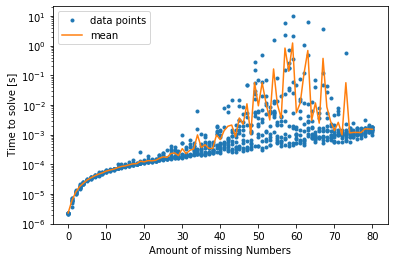

In [11]:
plt.plot(empty_positions_all, runtimes_all, ".", label  =  "data points")
plt.plot(means, label  =  "mean")
plt.semilogy(), plt.xlabel("Amount of missing Numbers"), plt.ylabel(" Time to solve [s]"), 
plt.legend()

### Check the impact diffrent start matrixes

In [12]:
start_matrix1 = [[1, 2, 3, 4, 5, 6, 7, 8, 9],   # easy matrix
                 [2, 3, 4, 5, 6, 7, 8, 9, 1],
                 [3, 4, 5, 6, 7, 8, 9, 1, 2],
                 [4, 5, 6, 7, 8, 9, 1, 2, 3],
                 [5, 6, 7, 8, 9, 1, 2, 3, 4],
                 [6, 7, 8, 9, 1, 2, 3, 4, 5],
                 [7, 8, 9, 1, 2, 3, 4, 5, 6],
                 [8, 9, 1, 2, 3, 4, 5, 6, 7],
                 [9, 1, 2, 3, 4, 5, 6, 7, 8]]

start_matrix2 = [[4, 8, 3, 9, 2, 1, 6, 5, 7],
                 [9, 6, 7, 3, 4, 5, 8, 2, 1],
                 [2, 5, 1, 8, 7, 6, 4, 9, 3],
                 [5, 4, 8, 1, 3, 2, 9, 7, 6],
                 [7, 2, 9, 5, 6, 4, 1, 3, 8],
                 [1, 3, 6, 7, 9, 8, 2, 4, 5],
                 [3, 7, 2, 6, 8, 9, 5, 1, 4],
                 [8, 1, 4, 2, 5, 3, 7, 6, 9],
                 [6, 9, 5, 4, 1, 7, 3, 8, 2]]

start_matrix3 = [[7, 4, 3, 9, 5, 1, 6, 8, 2],
                 [1, 6, 2, 4, 8, 7, 3, 9, 5],
                 [9, 5, 8, 6, 3, 2, 7, 1, 4],
                 [2, 1, 9, 8, 7, 3, 5, 4, 6],
                 [3, 7, 4, 5, 6, 9, 1, 2, 8],
                 [5, 8, 6, 1, 2, 4, 9, 7, 3],
                 [4, 9, 5, 2, 1, 6, 8, 3, 7],
                 [8, 2, 7, 3, 9, 5, 4, 6, 1],
                 [6, 3, 1, 7, 4, 8, 2, 5, 9]]

start_matrix4 = [[2, 5, 3, 1, 6, 8, 7, 9, 4],
                 [6, 1, 9, 7, 5, 3, 4, 2, 8],
                 [1, 4, 5, 3, 7, 9, 6, 8, 2],
                 [7, 9, 2, 5, 8, 4, 3, 1, 6],
                 [4, 2, 6, 9, 1, 7, 8, 3, 5],
                 [9, 8, 4, 2, 3, 6, 5, 7, 1],
                 [5, 7, 8, 4, 9, 2, 1, 6, 3],
                 [8, 3, 7, 6, 4, 1, 2, 5, 9],
                 [3, 6, 1, 8, 2, 5, 9, 4, 7]]
repetitions = 1

In [13]:

def runtime_check(start_matrix):
    """check runtime for 1 to 9*9 empty positions randomly choosed"""
    runtimes, empty_positions = [], []
    positions = [(x, y) for x in range(9) for y in range(9)]
    for empty_position in random.sample(range(9*9), 9*9):
        empty_positions.append(empty_position)
        new_matrix = copy.deepcopy(start_matrix)
        for position in random.sample(positions, empty_position):
            new_matrix[position[0]][position[1]] = 0
        start_time = time.time()
        solve_sudoko(new_matrix)
        solve_time = time.time() - start_time
        runtimes.append(solve_time)
    return runtimes, empty_positions

In [14]:
%%time
runtimes_all_1, empty_positions_all_1 = [], []
for run in range(repetitions):
    runtime_set, empty_position_set = runtime_check(start_matrix1)
    runtimes_all_1 += runtime_set
    empty_positions_all_1 += empty_position_set

means_1 = []
for i in range(9*9):
    alle = [runtimes_all_1[k] for k, d in enumerate(empty_positions_all_1) if d == i]
    mean = sum(alle)/len(alle)
    means_1.append(mean)

CPU times: user 547 ms, sys: 0 ns, total: 547 ms
Wall time: 547 ms


In [15]:
%%time
runtimes_all_2, empty_positions_all_2 = [], []
for run in range(repetitions):
    runtime_set, empty_position_set = runtime_check(start_matrix2)
    runtimes_all_2 += runtime_set
    empty_positions_all_2 += empty_position_set

means_2 = []
for i in range(9*9):
    alle = [runtimes_all_2[k] for k, d in enumerate(empty_positions_all_2) if d == i]
    mean = sum(alle)/len(alle)
    means_2.append(mean)

CPU times: user 3.77 s, sys: 0 ns, total: 3.77 s
Wall time: 3.77 s


In [16]:
%%time
runtimes_all_3, empty_positions_all_3 = [], []
for run in range(repetitions):
    runtime_set, empty_position_set = runtime_check(start_matrix3)
    runtimes_all_3 += runtime_set
    empty_positions_all_3 += empty_position_set

means_3 = []
for i in range(9*9):
    alle = [runtimes_all_3[k] for k, d in enumerate(empty_positions_all_3) if d == i]
    mean = sum(alle)/len(alle)
    means_3.append(mean)

CPU times: user 27min 53s, sys: 29.9 ms, total: 27min 53s
Wall time: 27min 54s


In [17]:
%%time
runtimes_all_4, empty_positions_all_4 = [], []
for run in range(repetitions):
    runtime_set, empty_position_set = runtime_check(start_matrix4)
    runtimes_all_4 += runtime_set
    empty_positions_all_4 += empty_position_set

means_4 = []
for i in range(9*9):
    alle = [runtimes_all_4[k] for k, d in enumerate(empty_positions_all_4) if d == i]
    mean = sum(alle)/len(alle)
    means_4.append(mean)

CPU times: user 3.46 s, sys: 0 ns, total: 3.46 s
Wall time: 3.46 s


([],
 Text(0.5, 0, 'Amount of missing Numbers'),
 Text(0, 0.5, ' Time to solve [s]'))

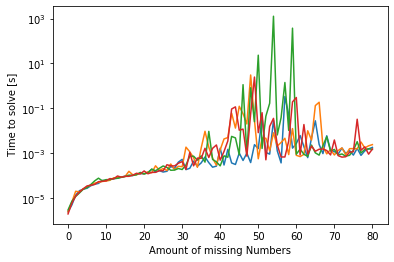

In [18]:
for mean in [means_1, means_2, means_3, means_4]:
    plt.plot(mean)
plt.semilogy(), plt.xlabel("Amount of missing Numbers"), plt.ylabel(" Time to solve [s]"), 

### Check distribution at diffrent positions:

In [19]:

def runtime_check_at_fix_emptiness(start_matrix, empty_positions):
    """check runtime for fix empty positions randomly choosed"""
    positions = [(x, y) for x in range(9) for y in range(9)]
    new_matrix = copy.deepcopy(start_matrix)
    for position in random.sample(positions, empty_positions):
        new_matrix[position[0]][position[1]] = 0
    start_time = time.time()
    solve_sudoko(new_matrix)
    solve_time = time.time() - start_time
    return solve_time

In [20]:
%%time
runtimes_30_missing = []
for run in range(200000):
    runtime = runtime_check_at_fix_emptiness(start_matrix, 30)
    runtimes_30_missing.append(runtime)

CPU times: user 1min 2s, sys: 60 ms, total: 1min 2s
Wall time: 1min 2s


(Text(0, 0.5, '#'), Text(0.5, 0, ' Time to solve [s]'))

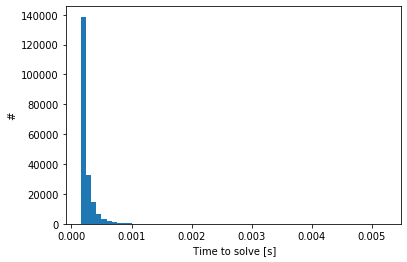

In [21]:
plt.hist(runtimes_30_missing, bins=60)
plt.ylabel("#"), plt.xlabel(" Time to solve [s]")
#plt.semilogy()